In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import sounddevice as sd

In [3]:
bomdia, Fs = librosa.load('bomdia.wav', sr=None)
bomdia_reverb, Fs = librosa.load('bomdia_reverb.wav', sr=None)

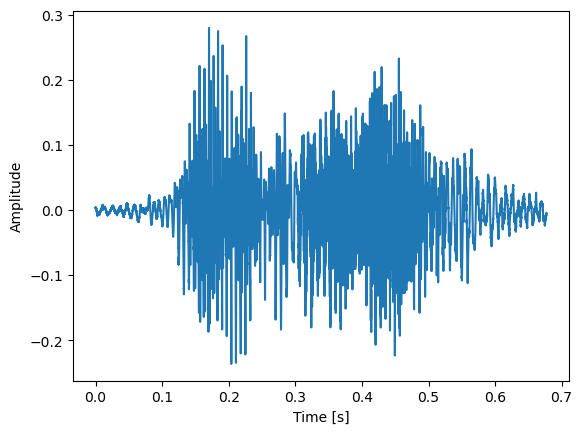

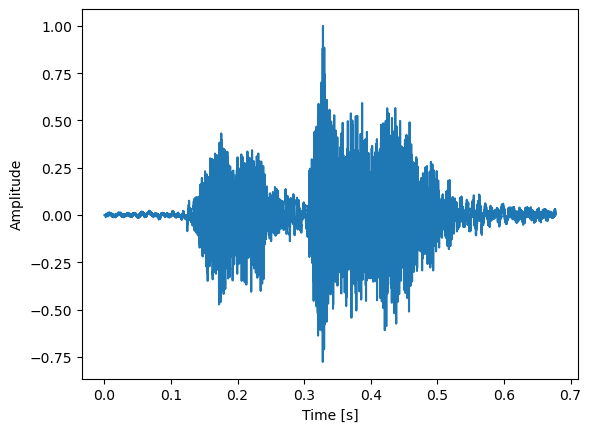

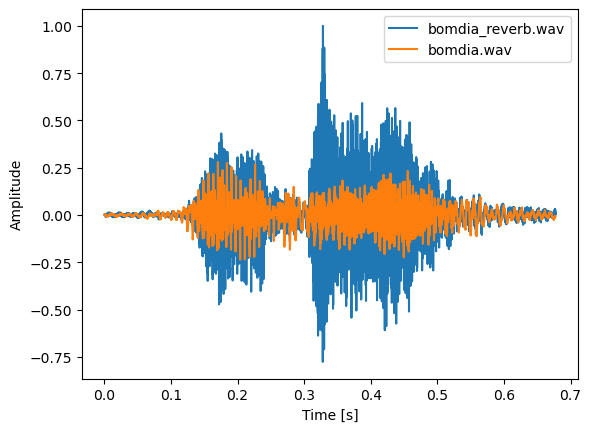

In [4]:
time = np.arange(0, len(bomdia)/Fs, 1/Fs)
plt.figure()
plt.plot(time, bomdia)
#plt.title('Time domain - bomdia.wav')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.savefig('q4_bomdia_time.pdf')
plt.show()

plt.figure()
plt.plot(time, bomdia_reverb)
#plt.title('Time domain - bomdia_reverb.wav')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.savefig('q4_bomdia_reverb_time.pdf')
plt.show()

plt.figure()
plt.plot(time, bomdia_reverb, label = 'bomdia_reverb.wav')
plt.plot(time, bomdia, label = 'bomdia.wav')
plt.legend()
#plt.title('Time domain comparison')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.savefig('q4_bomdia_comparison_time.pdf')
plt.show()

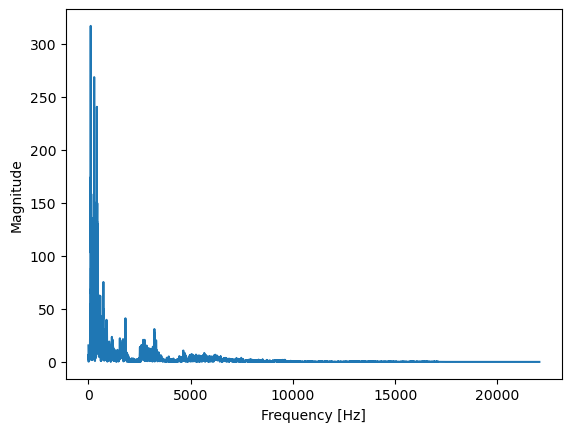

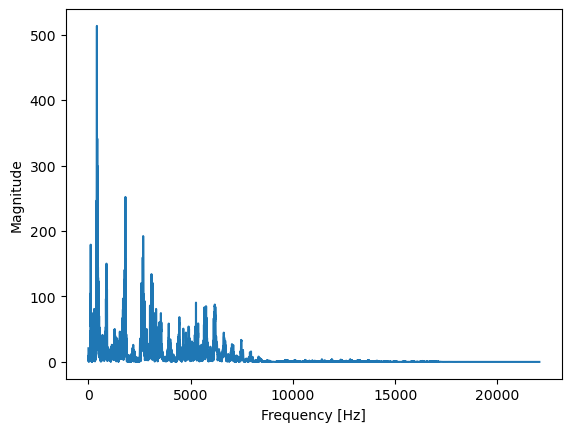

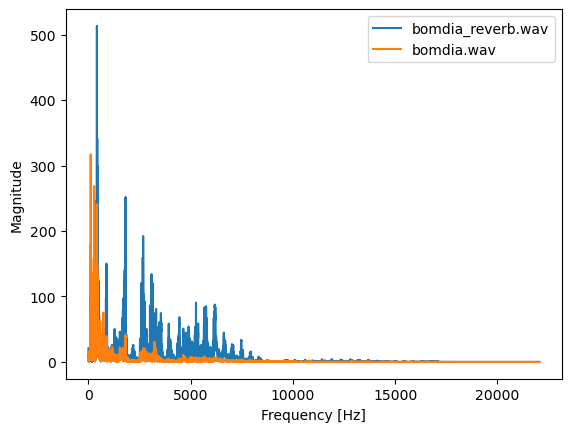

In [5]:
bomdia_freq = np.fft.fft(bomdia)
bomdia_reverb_freq = np.fft.fft(bomdia_reverb)

freq = np.fft.fftfreq(len(bomdia), 1/Fs)
bomdia_freq = bomdia_freq[:len(bomdia)//2]
bomdia_reverb_freq = bomdia_reverb_freq[:len(bomdia_reverb)//2]
freq = freq[:len(bomdia)//2]

plt.figure()
plt.plot(freq, np.abs(bomdia_freq))
#plt.title('Frequency Domain - bomdia.wav')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.savefig('q4_bomdia_freq.pdf')
plt.show()

plt.figure()
plt.plot(freq, np.abs(bomdia_reverb_freq))
#plt.title('Frequency Domain - bomdia_reverb.wav')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.savefig('q4_bomdia_reverb_freq.pdf')
plt.show()

plt.figure()
plt.plot(freq, np.abs(bomdia_reverb_freq), label='bomdia_reverb.wav')
plt.plot(freq, np.abs(bomdia_freq), label='bomdia.wav')
plt.legend()
#plt.title('Frequency Domain Comparison')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.savefig('q4_bomdia_comparison_freq.pdf')
plt.show()

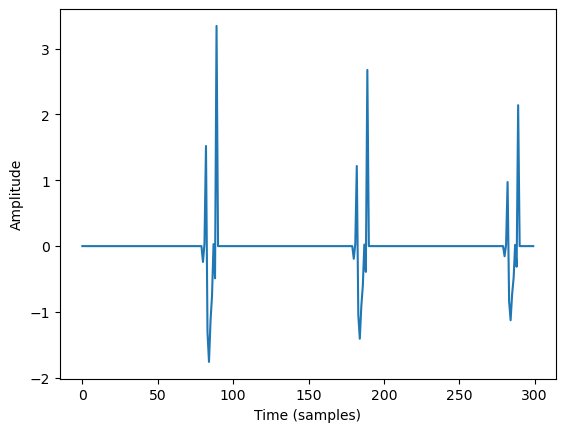

In [6]:
import scipy.io

mat = scipy.io.loadmat('imp_resp.mat')
h_n = mat['h']
h_n = h_n.reshape(h_n.shape[1])
plt.figure()
plt.plot(h_n)
#plt.title('Impulse Response')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.savefig('q4_hn_time.pdf')
plt.show()


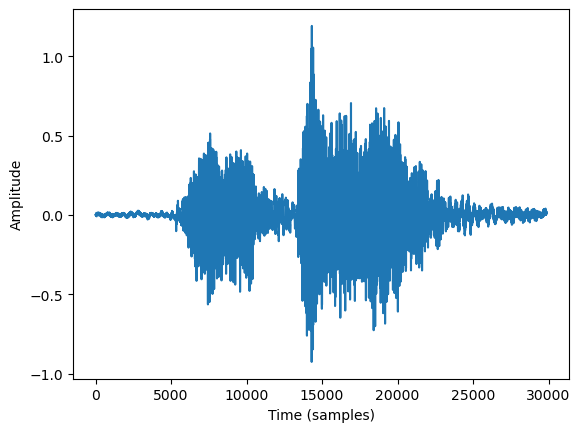

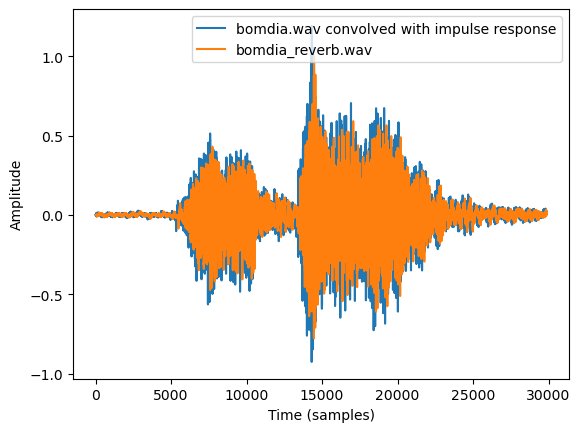

In [7]:
# Applying the impulse response to the audio signal
bomdia_conv = np.convolve(bomdia, h_n, mode='same')
plt.figure()
plt.plot(bomdia_conv)
#plt.title('Time domain - bomdia.wav convolved with impulse response')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.savefig('q4_bomdia_conv_time.pdf')
plt.show()

plt.figure()
plt.plot(bomdia_conv, label = 'bomdia.wav convolved with impulse response')
plt.plot(bomdia_reverb, label = 'bomdia_reverb.wav')
plt.legend()
#plt.title('Time domain comparison')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.savefig('q4_bomdia_comparison_conv_time.pdf')
plt.show()

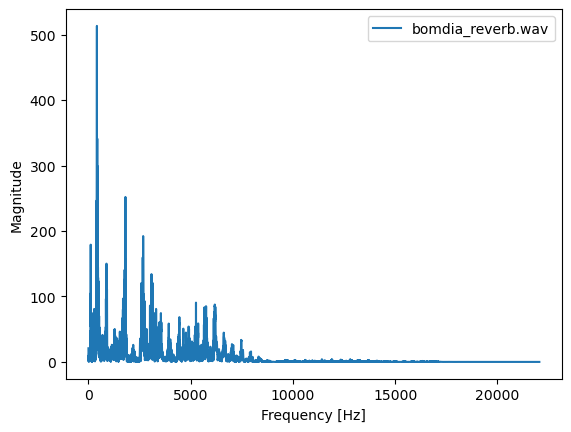

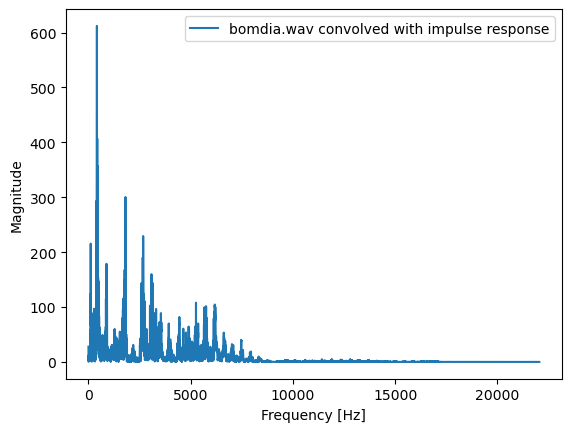

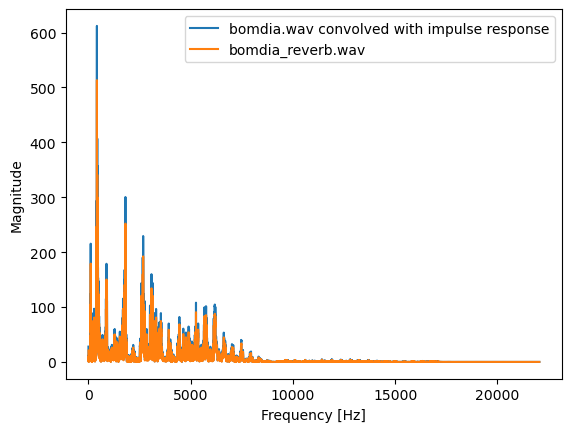

In [8]:
bomdia_conv_freq = np.fft.fft(bomdia_conv)

plt.figure()
plt.plot(freq, np.abs(bomdia_reverb_freq), label='bomdia_reverb.wav')
plt.legend()
#plt.title('Frequency Domain - bomdia_reverb.wav')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.savefig('q4_bomdia_reverb_freq.pdf')
plt.show()

plt.figure()
plt.plot(freq, np.abs(bomdia_conv_freq[:len(bomdia_reverb)//2]), label='bomdia.wav convolved with impulse response')
plt.legend()
#plt.title('Frequency Domain - bomdia.wav convolved with impulse response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.savefig('q4_bomdia_conv_freq.pdf')
plt.show()

plt.figure()
plt.plot(freq, np.abs(bomdia_conv_freq[:len(bomdia_reverb)//2]), label='bomdia.wav convolved with impulse response')
plt.plot(freq, np.abs(bomdia_reverb_freq), label='bomdia_reverb.wav')
plt.legend()
#plt.title('Frequency Domain Comparison')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.savefig('q4_bomdia_comparison_conv_freq.pdf')
plt.show()

In [9]:
sd.play(bomdia, Fs)

In [10]:
sd.play(bomdia_reverb, Fs)

In [11]:
sd.play(bomdia_conv, Fs)

Questão 5

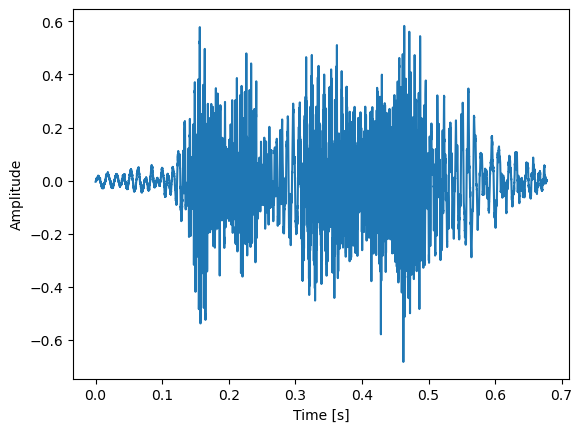

In [15]:
#Já que w[n] deve recuperar o sinal a[n], devemos considerar que W(e^jw) = H^-1(e^jw), com H(e^jw) sendo a transformada de Fourier da resposta ao impulso h[n] em que h[n] se refere a váriavel data.

H = np.fft.fft(h_n)
W = 1/H 
w = np.fft.ifft(W)
w = np.real(w)

bomdia_recovered = np.convolve(bomdia_reverb, w, mode='same')
plt.figure()
plt.plot(time, bomdia_recovered)
#plt.title('Time domain - bomdia_recovered.wav')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.savefig('q5_bomdia_recovered_time.pdf')
plt.show()




In [13]:
error = np.sum(np.abs(bomdia - bomdia_recovered)**2)
print('Error:', error)


Error: 652.1870973247995
